In [ ]:
!unzip data.zip

In [ ]:
#import statements 
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
#model importting
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


from keras import optimizers
from keras import losses
from keras import regularizers

import cv2 
import imghdr

#**Remove wrong images**

In [ ]:
data_dir = 'data'

In [ ]:
os.listdir(data_dir)

['bad', 'good']

In [ ]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [ ]:
#looping through both folders, then all images in the sub folder, and removing images without the right extension
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print ('issue with image {}'.format(image_path))

image not in ext list data/good/Stealingtheball-1024x683.png


#**Preprocess data**

In [ ]:
#store data
data = tf.keras.utils.image_dataset_from_directory('data')

Found 185 files belonging to 2 classes.


In [ ]:
# pre process data
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

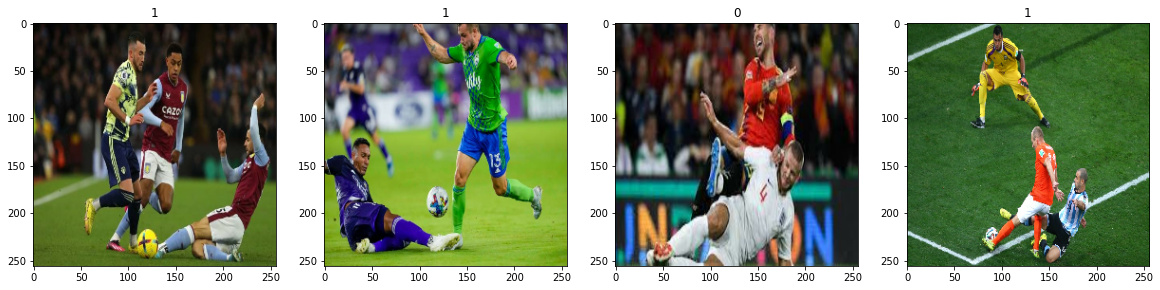

In [ ]:
fig, ax = plt.subplots(ncols =4, figsize =(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

#**Split data**

In [ ]:
len(data)

6

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size + val_size + test_size

5

In [ ]:
print(train_size)
print(val_size)
print(test_size)


4
1
0


In [ ]:
test_size +=1

In [ ]:
train_size + val_size + test_size


6

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

#**Build Model**

In [ ]:
def plot_results(plot1,plot2,mark1, mark2,label1,label2,title1,labelY):
    
    plt.clf()

    epochs = range(1, len(plot1) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.plot(epochs, plot1, mark1 , label = label1)
    plt.plot(epochs, plot2, mark2, label = label2)
    plt.title(title1)
    plt.xlabel('Epochs')
    plt.ylabel(labelY)
    plt.legend()

    plt.show()
def compareAccLoss(hist,label1):
   # print the models accuracy and loss
    print(label1 +' Validation Accuracy: ', max(hist['val_accuracy']))
    print(label1 +' Validation Loss: ', min(hist['val_loss']))
    print()
    
    # Plot loss
    plot_results(hist['loss'],hist['val_loss'],'bo','b','Training Loss','Validation Loss',label1 + ' Training and Validation Loss','Loss')
    # Plot acc
    plot_results(hist['accuracy'],hist['val_accuracy'],'bo','b','Training Acc','Validation Acc',label1 + ' Training and Validation Acc','Accuracy')

#**Model 1**

In [ ]:
#the model expects RGB images of size 256x256
inputs = keras.Input(shape=(256, 256, 3))

#rescale input to the [0,1] range by dividing by 255
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                         

In [ ]:
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

In [ ]:
m1_history = model.fit(
  train,  
  epochs=20,
  validation_data=val).history

Epoch 1/20
4/4 [==============================] - 14s 403ms/step - loss: 0.7001 - accuracy: 0.5781 - val_loss: 0.7025 - val_accuracy: 0.3438
Epoch 2/20
4/4 [==============================] - 2s 349ms/step - loss: 0.6905 - accuracy: 0.5469 - val_loss: 0.7099 - val_accuracy: 0.4375
Epoch 3/20
4/4 [==============================] - 3s 488ms/step - loss: 0.6961 - accuracy: 0.4844 - val_loss: 0.6913 - val_accuracy: 0.5625
Epoch 4/20
4/4 [==============================] - 2s 356ms/step - loss: 0.6957 - accuracy: 0.4688 - val_loss: 0.6917 - val_accuracy: 0.5312
Epoch 5/20
4/4 [==============================] - 2s 352ms/step - loss: 0.6946 - accuracy: 0.4844 - val_loss: 0.6866 - val_accuracy: 0.6250
Epoch 6/20
4/4 [==============================] - 2s 488ms/step - loss: 0.6944 - accuracy: 0.5234 - val_loss: 0.6854 - val_accuracy: 0.6875
Epoch 7/20
4/4 [==============================] - 2s 375ms/step - loss: 0.6896 - accuracy: 0.5625 - val_loss: 0.6747 - val_accuracy: 0.6250
Epoch 8/20
4/4 [===

baseline model Validation Accuracy:  0.6875
baseline model Validation Loss:  0.6735708713531494



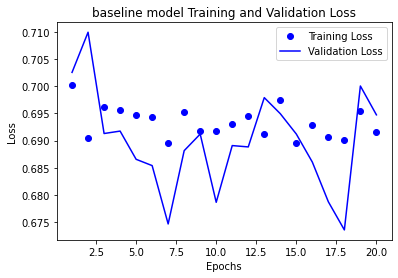

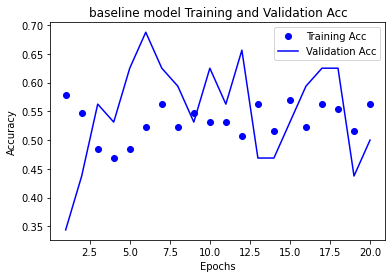

In [ ]:
compareAccLoss(m1_history,'baseline model')

# **Model 1: Evaluation on performance**
|Model|epochs|  min val loss|max val acc|
|:----|------|-----------|----------|
|1   |20    | 0.6735 |0.6875     |

#**Model 2**

In [ ]:
#model 2 with the extra layers

model = models.Sequential()
#the model expects RGB images of size 180x180
inputs = keras.Input(shape=(256, 256, 3))

#rescale input to the [0,1] range by dividing by 255
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

#compile the model
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

model.summary()

m2_history = model.fit(
  train,  
  epochs=20,
  validation_data=val).history

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                       

model 2 Validation Accuracy:  0.6875
model 2 Validation Loss:  0.6723452806472778



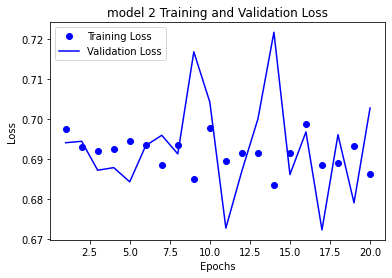

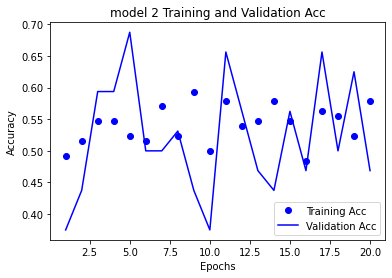

In [ ]:
compareAccLoss(m2_history,'model 2')

# **Model 2: Evaluation on performance**
|Model|epochs|  min val loss|max val acc|
|:----|------|-----------|----------|
|1   |20    | 0.6735 |0.6875     |
|2  |20|  0.6723|  0.6875  |

#**Model 3**

In [ ]:
#model 3 with the different number of filters

model = models.Sequential()
#the model expects RGB images of size 180x180
inputs = keras.Input(shape=(256, 256, 3))

#rescale input to the [0,1] range by dividing by 255
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

#compile the model
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

model.summary()

m3_history = model.fit(
  train,  
  epochs=20,
  validation_data=val).history

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                       

 model 3 Validation Accuracy:  0.71875
 model 3 Validation Loss:  0.6691445112228394



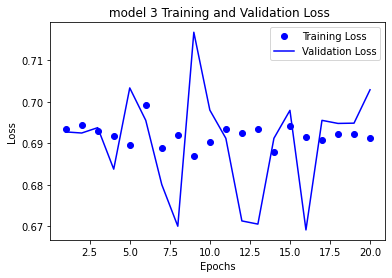

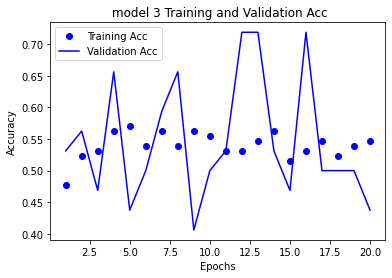

In [ ]:
compareAccLoss(m3_history, ' model 3')

# **Model 3: Evaluation on performance**
|Model|epochs|  min val loss|max val acc|
|:----|------|-----------|----------|
|1   |20    | 0.6735 |0.6875     |
|2  |20|  0.6723|  0.6875  |
| 3 |20 |  0.6691    | 0.7187    |

#**Model 4**

In [ ]:
#model 4 with the different number of filters

model = models.Sequential()
#the model expects RGB images of size 180x180
inputs = keras.Input(shape=(256, 256, 3))

#rescale input to the [0,1] range by dividing by 255
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

#compile the model
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

model.summary()

m4_history = model.fit(
  train,  
  epochs=20,
  validation_data=val).history

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 rescaling_3 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 62, 62, 128)      0         
 g2D)                                                      

model 4 Validation Accuracy:  0.75
model 4 Validation Loss:  0.6682104468345642



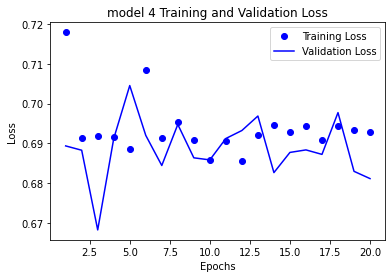

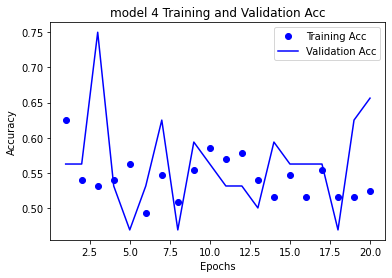

In [ ]:
compareAccLoss(m4_history, 'model 4')

# **Model 4: Evaluation on performance**
|Model|epochs|  min val loss|max val acc|
|:----|------|-----------|----------|
|1   |20    | 0.6735 |0.6875     |
|2  |20|  0.6723|  0.6875  |
| 3 |20 |  0.6691    | 0.7187    |
|4  |20 |  0.6682    |  0.75  |

#**Model 5**

In [ ]:
#model 5 with the different number of filters

model = models.Sequential()
#the model expects RGB images of size 180x180
inputs = keras.Input(shape=(256, 256, 3))

#rescale input to the [0,1] range by dividing by 255
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

#compile the model
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

model.summary()

m5_history = model.fit(
  train,  
  epochs=20,
  validation_data=val).history

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 rescaling_4 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                      

model 5 Validation Accuracy:  0.71875
model 5 Validation Loss:  0.6665311455726624



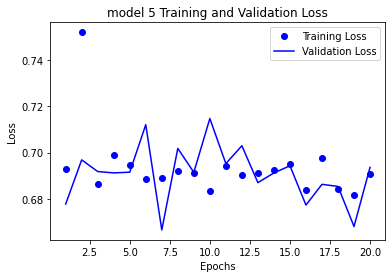

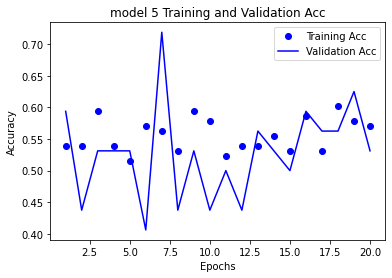

In [ ]:
compareAccLoss(m5_history, 'model 5')

# **Model 5: Evaluation on performance**
|Model|epochs|  min val loss|max val acc|
|:----|------|-----------|----------|
|1   |20    | 0.6735 |0.6875     |
|2  |20|  0.6723|  0.6875  |
| 3 |20 |  0.6691    | 0.7187    |
|4  |20 |  0.6682    |  0.75  |
|5  |20 | 0.6665  | 0.7187  |

#**Model 6**

In [ ]:
#model 6 with the different number of filters

model = models.Sequential()
#the model expects RGB images of size 180x180
inputs = keras.Input(shape=(256, 256, 3))

#rescale input to the [0,1] range by dividing by 255
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

#compile the model
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

model.summary()

m6_history = model.fit(
  train,  
  epochs=20,
  validation_data=val).history

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 rescaling_5 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 125, 125, 64)      9280      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                      

model 6 Validation Accuracy:  0.71875
model 6 Validation Loss:  0.6237943172454834



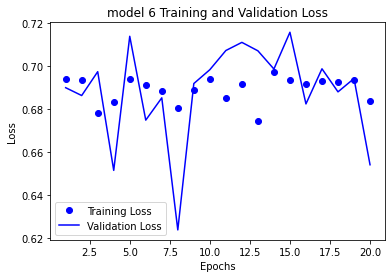

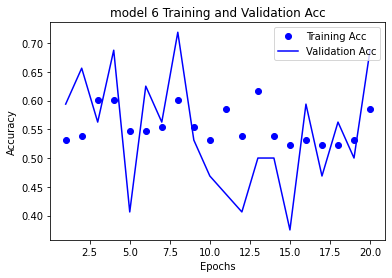

In [ ]:
compareAccLoss(m6_history, 'model 6')

# **Model 6: Evaluation on performance**
|Model|epochs|  min val loss|max val acc|
|:----|------|-----------|----------|
|1   |20    | 0.6735 |0.6875     |
|2  |20|  0.6723|  0.6875  |
| 3 |20 |  0.6691    | 0.7187    |
|4  |20 |  0.6682    |  0.75  |
|5  |20 | 0.6665  | 0.7187  |
|6  |20 |  0.6237     |  0.7187   |

Changed all of the combinations of filters and model 4 has the best validation accuracy

#**Model 7**

In [ ]:
#model 4 with the different number of filters

model = models.Sequential()

#data augmentation layers
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
  ]
)

#the model expects RGB images of size 180x180
inputs = keras.Input(shape=(256, 256, 3))

x = data_augmentation(inputs)
#rescale input to the [0,1] range by dividing by 255
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

#compile the model
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

model.summary()

m7_history = model.fit(
  train,  
  epochs=20,
  validation_data=val).history

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 rescaling_6 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_23 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 62, 62, 128)      0         
 g2D)                                                      

model 7 Validation Accuracy:  0.6875
model 7 Validation Loss:  0.6502446532249451



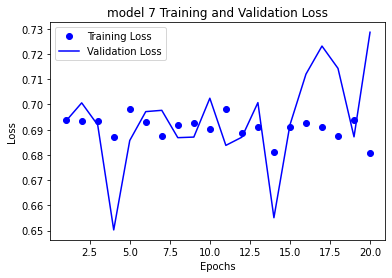

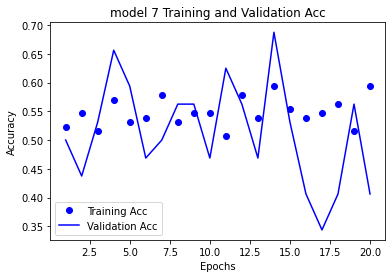

In [ ]:
compareAccLoss(m7_history, 'model 7')

# **Model 7: Evaluation on performance**
|Model|epochs|  min val loss|max val acc|
|:----|------|-----------|----------|
|1   |20    | 0.6735 |0.6875     |
|2  |20|  0.6723|  0.6875  |
| 3 |20 |  0.6691    | 0.7187    |
|4  |20 |  0.6682    |  0.75  |
|5  |20 | 0.6665  | 0.7187  |
|6  |20 |  0.6237     |  0.7187   |
|data augmentation and dropout|
| 7 |20 |  0.6502 |    0.6875|

#**Model 8**

In [ ]:
#model 4 with the different number of filters

model = models.Sequential()

#data augmentation layers
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
  ]
)

#the model expects RGB images of size 180x180
inputs = keras.Input(shape=(256, 256, 3))

x = data_augmentation(inputs)
#rescale input to the [0,1] range by dividing by 255
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

#compile the model
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

model.summary()

m8_history = model.fit(
  train,  
  epochs=20,
  validation_data=val).history

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 rescaling_7 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 62, 62, 128)      0         
 g2D)                                                      

model 8 Validation Accuracy:  0.6875
model 8 Validation Loss:  0.6739097833633423



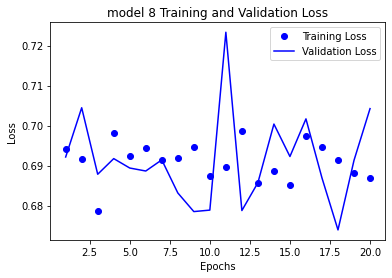

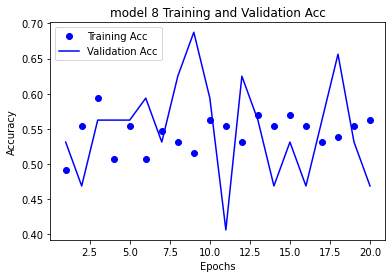

In [ ]:
compareAccLoss(m8_history, 'model 8')

# **Model 8: Evaluation on performance**
|Model|epochs|  min val loss|max val acc|
|:----|------|-----------|----------|
|1   |20    | 0.6735 |0.6875     |
|2  |20|  0.6723|  0.6875  |
| 3 |20 |  0.6691    | 0.7187    |
|4  |20 |  0.6682    |  0.75  |
|5  |20 | 0.6665  | 0.7187  |
|6  |20 |  0.6237     |  0.7187   |
|data augmentation and dropout|
| 7 |20 |  0.6502 |    0.6875|
|8  |20  |  0.6739  |    0.6875|

#**Model 9**

In [ ]:
#model 4 with the different number of filters

model = models.Sequential()

#data augmentation layers
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
  ]
)

#the model expects RGB images of size 180x180
inputs = keras.Input(shape=(256, 256, 3))

x = data_augmentation(inputs)
#rescale input to the [0,1] range by dividing by 255
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

#compile the model
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

model.summary()

m9_history = model.fit(
  train,  
  epochs=20,
  validation_data=val).history

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 rescaling_8 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_31 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 62, 62, 128)      0         
 g2D)                                                      

 model 9 Validation Accuracy:  0.65625
 model 9 Validation Loss:  0.6616901159286499



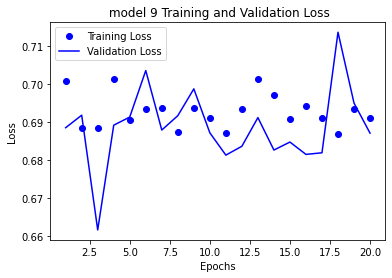

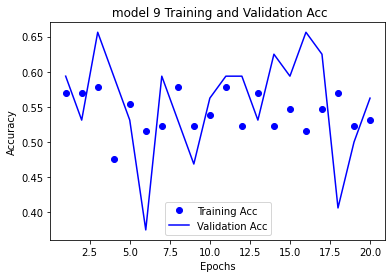

In [ ]:
compareAccLoss(m9_history, ' model 9')

# **Model 9: Evaluation on performance**
|Model|epochs|  min val loss|max val acc|
|:----|------|-----------|----------|
|1   |20    | 0.6735 |0.6875     |
|2  |20|  0.6723|  0.6875  |
| 3 |20 |  0.6691    | 0.7187    |
|4  |20 |  0.6682    |  0.75  |
|5  |20 | 0.6665  | 0.7187  |
|6  |20 |  0.6237     |  0.7187   |
|data augmentation and dropout|
| 7 |20 |  0.6502 |    0.6875|
|8  |20  |  0.6739  |    0.6875|
|9  |20  | 0.6616  | 0.6562  |

#**Model 10**

In [ ]:
#model 4 with the different number of filters

model = models.Sequential()

#data augmentation layers
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
  ]
)

#the model expects RGB images of size 180x180
inputs = keras.Input(shape=(256, 256, 3))

x = data_augmentation(inputs)
#rescale input to the [0,1] range by dividing by 255
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

#compile the model
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

model.summary()

m10_history = model.fit(
  train,  
  epochs=20,
  validation_data=val).history

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 rescaling_9 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_35 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 62, 62, 128)      0         
 g2D)                                                      

 model 10 Validation Accuracy:  0.75
 model 10 Validation Loss:  0.6594581604003906



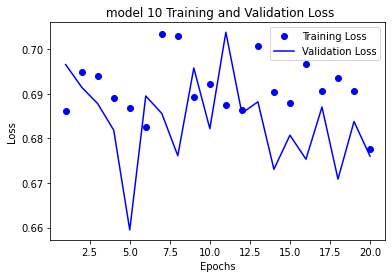

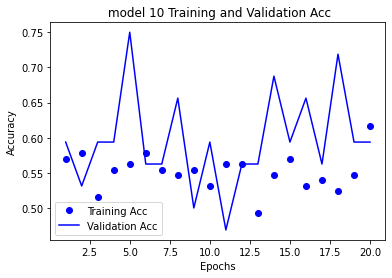

In [ ]:
compareAccLoss(m10_history, ' model 10')

# **Model 10: Evaluation on performance**
|Model|epochs|  min val loss|max val acc|
|:----|------|-----------|----------|
|1   |20    | 0.6735 |0.6875     |
|2  |20|  0.6723|  0.6875  |
| 3 |20 |  0.6691    | 0.7187    |
|4  |20 |  0.6682    |  0.75  |
|5  |20 | 0.6665  | 0.7187  |
|6  |20 |  0.6237     |  0.7187   |
|data augmentation and dropout|
| 7 |20 |  0.6502 |    0.6875|
|8  |20  |  0.6739  |    0.6875|
|9  |20  | 0.6616  | 0.6562  |
|10 |20 | 0.6594   | 0.75   |

#**Model 11**

In [ ]:
#instantiating vgg16 convolutional base
conv_base = keras.applications.vgg16.VGG16(
weights="imagenet",
include_top=False)
conv_base.trainable = False

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
#model 11

model = models.Sequential()

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
  ]
)

#apply data augmentation and then apply input value scaling
inputs = keras.Input(shape=(256, 256, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

model.compile(loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

m11_history = model.fit(
  train,  
  epochs=30,
  validation_data=val).history

Epoch 1/30


4/4 [==============================] - 14s 2s/step - loss: 43.0030 - accuracy: 0.4922 - val_loss: 16.9804 - val_accuracy: 0.4375
Epoch 2/30
4/4 [==============================] - 3s 568ms/step - loss: 20.5594 - accuracy: 0.4453 - val_loss: 16.3003 - val_accuracy: 0.5938
Epoch 3/30
4/4 [==============================] - 3s 632ms/step - loss: 17.9979 - accuracy: 0.5156 - val_loss: 5.0926 - val_accuracy: 0.3750
Epoch 4/30
4/4 [==============================] - 5s 1s/step - loss: 13.1603 - accuracy: 0.5156 - val_loss: 7.3528 - val_accuracy: 0.5938
Epoch 5/30
4/4 [==============================] - 5s 1s/step - loss: 10.5294 - accuracy: 0.4766 - val_loss: 19.6777 - val_accuracy: 0.5938
Epoch 6/30
4/4 [==============================] - 5s 1s/step - loss: 12.6121 - accuracy: 0.5156 - val_loss: 6.2488 - val_accuracy: 0.5000
Epoch 7/30
4/4 [==============================] - 3s 782ms/step - loss: 17.2218 - accuracy: 0.4453 - val_loss: 4.9470 - val_accuracy: 0.6250
Epoch 8/30
4/4 [================

model 11 Validation Accuracy:  0.6875
model 11 Validation Loss:  0.9284746050834656



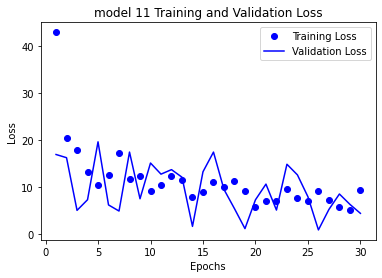

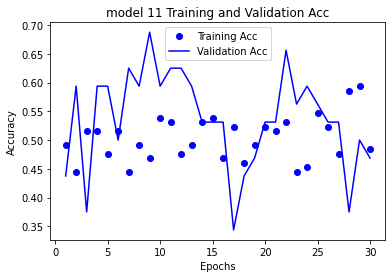

In [ ]:
compareAccLoss(m11_history, 'model 11')

# **Model 11: Evaluation on performance**
|Model|epochs|  min val loss|max val acc|
|:----|------|-----------|----------|
|1   |20    | 0.6735 |0.6875     |
|2  |20|  0.6723|  0.6875  |
| 3 |20 |  0.6691    | 0.7187    |
|4  |20 |  0.6682    |  0.75  |
|5  |20 | 0.6665  | 0.7187  |
|6  |20 |  0.6237     |  0.7187   |
|data augmentation and dropout|
| 7 |20 |  0.6502 |    0.6875|
|8  |20  |  0.6739  |    0.6875|
|9  |20  | 0.6616  | 0.6562  |
|10 |20 | 0.6594   | 0.75   |
| pretrained model|
|11| 30  |  0.9284 |0.6875|

#**Model 12**

In [ ]:
#model 12 with the different number of filters

model = models.Sequential()

#data augmentation layers
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
  ]
)

#the model expects RGB images of size 180x180
inputs = keras.Input(shape=(256, 256, 3))

x = data_augmentation(inputs)
#rescale input to the [0,1] range by dividing by 255
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

#compile the model
model.compile(loss="binary_crossentropy",
optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
metrics=["accuracy"])

model.summary()

m12_history = model.fit(
  train,  
  epochs=30,
  validation_data=val).history

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 rescaling_15 (Rescaling)    (None, 256, 256, 3)       0         
                                                                 
 conv2d_59 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_60 (Conv2D)          (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 62, 62, 128)      0         
 g2D)                                                     

model 12 Validation Accuracy:  0.6875
model 12 Validation Loss:  0.6920943260192871



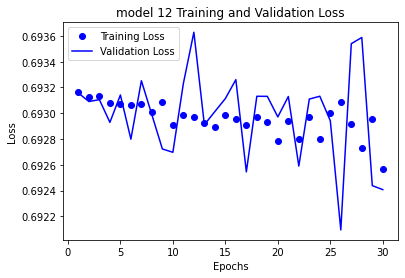

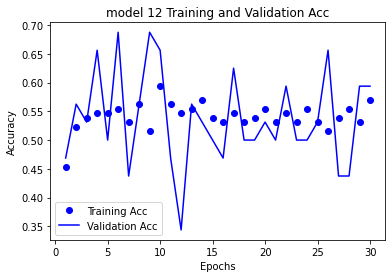

In [ ]:
compareAccLoss(m12_history, 'model 12')

# **Model 12: Evaluation on performance**
|Model|epochs|  min val loss|max val acc|
|:----|------|-----------|----------|
|1   |20    | 0.6735 |0.6875     |
|2  |20|  0.6723|  0.6875  |
| 3 |20 |  0.6691    | 0.7187    |
|4  |20 |  0.6682    |  0.75  |
|5  |20 | 0.6665  | 0.7187  |
|6  |20 |  0.6237     |  0.7187   |
|data augmentation and dropout|
| 7 |20 |  0.6502 |    0.6875|
|8  |20  |  0.6739  |    0.6875|
|9  |20  | 0.6616  | 0.6562  |
|10 |20 | 0.6594   | 0.75   |
| feature extraction|
|11| 30  |  0.9284 |0.6875|
| learning rate |
|12 |20|  0.6923 |   0.7187|

#**Model 13**

In [ ]:
#model 4 with the different number of filters

model = models.Sequential()

#data augmentation layers
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
  ]
)

#the model expects RGB images of size 180x180
inputs = keras.Input(shape=(256, 256, 3))

x = data_augmentation(inputs)
#rescale input to the [0,1] range by dividing by 255
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

#compile the model
model.compile(loss="binary_crossentropy",
optimizer=keras.optimizers.RMSprop(learning_rate=1e-2),
metrics=["accuracy"])

model.summary()

m13_history = model.fit(
  train,  
  epochs=30,
  validation_data=val).history

In [ ]:
compareAccLoss(m13_history, 'model 13')

# **Model 13: Evaluation on performance**
|Model|epochs|  min val loss|max val acc|
|:----|------|-----------|----------|
|1   |20    | 0.6735 |0.6875     |
|2  |20|  0.6723|  0.6875  |
| 3 |20 |  0.6691    | 0.7187    |
|4  |20 |  0.6682    |  0.75  |
|5  |20 | 0.6665  | 0.7187  |
|6  |20 |  0.6237     |  0.7187   |
|data augmentation and dropout|
| 7 |20 |  0.6502 |    0.6875|
|8  |20  |  0.6739  |    0.6875|
|9  |20  | 0.6616  | 0.6562  |
|10 |20 | 0.6594   | 0.75   |
| feature extraction|
|11| 30  |  0.9284 |0.6875|
| learning rate |
|12 |20|  0.6923 |   0.7187|
|13 | 20 | 0.6740 |  0.6562|

#**Model 14**

In [ ]:
#model 4 with the different number of filters

model = models.Sequential()

#data augmentation layers
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
  ]
)

#the model expects RGB images of size 180x180
inputs = keras.Input(shape=(256, 256, 3))

x = data_augmentation(inputs)
#rescale input to the [0,1] range by dividing by 255
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

#compile the model
model.compile(loss="binary_crossentropy",
optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
metrics=["accuracy"])

model.summary()

m14_history = model.fit(
  train,  
  epochs=30,
  validation_data=val).history

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 rescaling_12 (Rescaling)    (None, 256, 256, 3)       0         
                                                                 
 conv2d_47 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 62, 62, 128)      0         
 g2D)                                                     

model 14 Validation Accuracy:  0.71875
model 14 Validation Loss:  0.6444021463394165



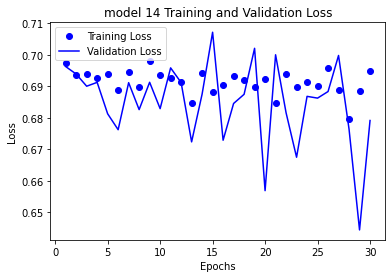

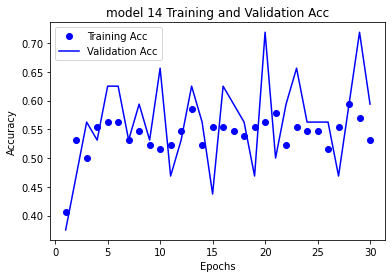

In [ ]:
compareAccLoss(m14_history, 'model 14')

# **Model 14: Evaluation on performance**
|Model|epochs|  min val loss|max val acc|
|:----|------|-----------|----------|
|1   |20    | 0.6735 |0.6875     |
|2  |20|  0.6723|  0.6875  |
| 3 |20 |  0.6691    | 0.7187    |
|4  |20 |  0.6682    |  0.75  |
|5  |20 | 0.6665  | 0.7187  |
|6  |20 |  0.6237     |  0.7187   |
|data augmentation and dropout|
| 7 |20 |  0.6502 |    0.6875|
|8  |20  |  0.6739  |    0.6875|
|9  |20  | 0.6616  | 0.6562  |
|10 |20 | 0.6594   | 0.75   |
| feature extraction|
|11| 30  |  0.9284 |0.6875|
| learning rate |
|12 |20|  0.6923 |   0.7187|
|13 | 20 | 0.6740 |  0.6562|
|14 |30 |   0.6444 |  0.7187 |

#**Model 15**

In [ ]:
#model 4 with the different number of filters

model = models.Sequential()

#data augmentation layers
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
  ]
)

#the model expects RGB images of size 180x180
inputs = keras.Input(shape=(256, 256, 3))

x = data_augmentation(inputs)
#rescale input to the [0,1] range by dividing by 255
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

#compile the model
model.compile(loss="binary_crossentropy",
optimizer=keras.optimizers.RMSprop(learning_rate=0.01),
metrics=["accuracy"])

model.summary()

m15_history = model.fit(
  train,  
  epochs=20,
  validation_data=val).history

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 rescaling_13 (Rescaling)    (None, 256, 256, 3)       0         
                                                                 
 conv2d_51 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 62, 62, 128)      0         
 g2D)                                                     

model 15 Validation Accuracy:  0.59375
model 15 Validation Loss:  0.6755392551422119



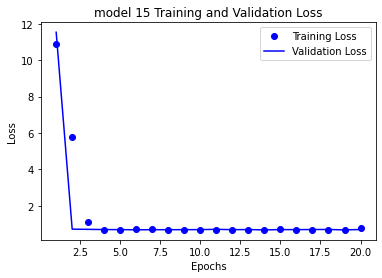

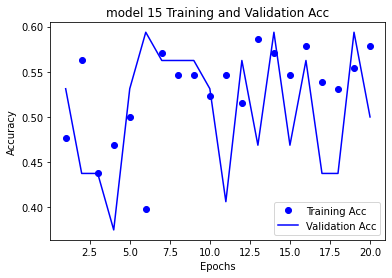

In [ ]:
compareAccLoss(m15_history,'model 15')

# **Model 15: Evaluation on performance**
|Model|epochs|  min val loss|max val acc|
|:----|------|-----------|----------|
|1   |20    | 0.6735 |0.6875     |
|2  |20|  0.6723|  0.6875  |
| 3 |20 |  0.6691    | 0.7187    |
|4  |20 |  0.6682    |  0.75  |
|5  |20 | 0.6665  | 0.7187  |
|6  |20 |  0.6237     |  0.7187   |
|data augmentation and dropout|
| 7 |20 |  0.6502 |    0.6875|
|8  |20  |  0.6739  |    0.6875|
|9  |20  | 0.6616  | 0.6562  |
|10 |20 | 0.6594   | 0.75   |
| feature extraction|
|11| 30  |  0.9284 |0.6875|
| learning rate |
|12 |20|  0.6923 |   0.7187|
|13 | 20 | 0.6740 |  0.6562|
|14 |30 |   0.6444 |  0.7187 |
|15| 30 | 0.6755  | 0.5937  |

#**Testing**

In [ ]:
#model 4 with the different number of filters

model = models.Sequential()

#data augmentation layers
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
  ]
)

#the model expects RGB images of size 180x180
inputs = keras.Input(shape=(256, 256, 3))

x = data_augmentation(inputs)
#rescale input to the [0,1] range by dividing by 255
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

#compile the model
model.compile(loss="binary_crossentropy",
optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
metrics=["accuracy"])

model.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 rescaling_16 (Rescaling)    (None, 256, 256, 3)       0         
                                                                 
 conv2d_63 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_64 (Conv2D)          (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 62, 62, 128)      0         
 g2D)                                                     

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 0s 29ms/step


In [ ]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')


Precision:0.0, Recall:0.0, Accuracy:0.4399999976158142


#**Good test**

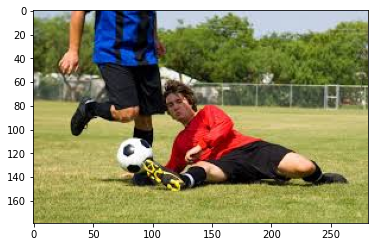

In [ ]:
img = cv2.imread('/content/goodTest.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

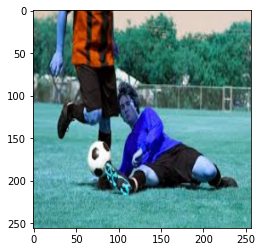

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
np.expand_dims(resize, 0)

array([[[[224.79688 , 195.94922 , 180.89844 ],
         [220.69531 , 194.84766 , 178.84766 ],
         [218.23828 , 194.50781 , 178.2539  ],
         ...,
         [233.47656 , 211.47656 , 200.47656 ],
         [230.76172 , 208.76172 , 197.76172 ],
         [230.      , 208.      , 197.      ]],

        [[224.82474 , 198.14453 , 182.57278 ],
         [221.24414 , 197.21019 , 181.12659 ],
         [218.92645 , 197.52208 , 180.8587  ],
         ...,
         [231.83865 , 211.75526 , 200.75526 ],
         [229.49684 , 208.76172 , 197.76172 ],
         [227.86043 , 208.      , 197.      ]],

        [[222.90106 , 200.20987 , 184.20987 ],
         [220.49286 , 199.61066 , 183.4961  ],
         [218.56299 , 200.18506 , 183.4331  ],
         ...,
         [229.56299 , 212.54346 , 201.29541 ],
         [227.25458 , 209.04755 , 197.7995  ],
         [224.86133 , 208.24805 , 197.      ]],

        ...,

        [[ 62.80078 , 149.31729 , 152.79599 ],
         [ 77.1926  , 163.90677 , 166.99014 ]

In [ ]:
yhat

array([[0.49995786]], dtype=float32)

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 23ms/step


In [ ]:
if yhat < 0.5:
  print(f'predicted class is that this is a red card')
else:
  print((f'predicated class is that this is Not a red card'))

predicted class is that this is a red card


#**Bad Test**

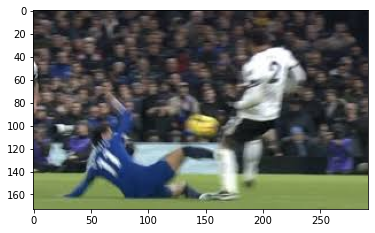

In [ ]:
img = cv2.imread('/content/bad test.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

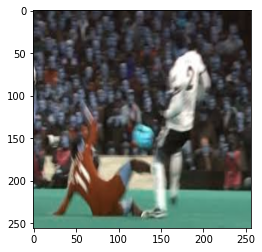

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
np.expand_dims(resize, 0)

array([[[[ 57.929688,  58.929688,  56.929688],
         [ 56.367188,  57.367188,  55.367188],
         [ 52.59375 ,  53.59375 ,  51.59375 ],
         ...,
         [ 33.648438,  26.648438,  23.648438],
         [ 35.578125,  28.578125,  25.578125],
         [ 37.859375,  30.859375,  27.859375]],

        [[ 55.838882,  56.838882,  54.838882],
         [ 53.690475,  54.690475,  52.690475],
         [ 49.150543,  50.150543,  48.150543],
         ...,
         [ 31.080078,  24.080078,  21.080078],
         [ 32.604446,  25.604446,  22.604446],
         [ 34.777344,  27.777344,  24.777344]],

        [[ 51.78871 ,  52.59926 ,  50.978165],
         [ 49.341644,  50.15219 ,  48.531097],
         [ 44.64142 ,  45.451965,  43.83087 ],
         ...,
         [ 27.578323,  20.578323,  17.578323],
         [ 28.652344,  21.652344,  18.652344],
         [ 30.722656,  23.722656,  20.722656]],

        ...,

        [[ 88.      , 153.      , 131.      ],
         [ 88.      , 153.      , 131.      ]

In [ ]:
yhat

array([[0.49996686]], dtype=float32)

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 24ms/step


In [ ]:
if yhat < 0.5:
  print(f'predicted class is that this is a red card')
else:
  print((f'predicated class is that this is Not a red card'))

predicted class is that this is a red card
